### Performance Metrics Clustering-Silhouetter Coefficient

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

In [2]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

In [36]:
import pandas as pd

clust = pd.read_csv('S:/Hackathons/EY/results/clust0.csv')

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13]

clust1 = clust[['covid_index','dist_index']]

X = np.array(clust1[['covid_index','dist_index']])


In [37]:
clust.head()

,District_Key,dist_index,covid_index,clusters
0,AN_Nicobar,0.002471,0.000010,2
1,AN_North and Middle Andaman,0.007295,0.000011,2
2,AN_South Andaman,0.017887,0.000038,2
3,AP_Anantapur,0.179704,0.097562,6
4,AP_Chittoor,0.189777,0.130503,6


In [29]:
X

array([[1.00000000e-05, 2.47074918e-03],
       [1.12322381e-05, 7.29535267e-03],
       [3.78724411e-05, 1.78874120e-02],
       ...,
       [5.39621587e-04, 6.08265690e-02],
       [3.03893643e-04, 3.53201313e-02],
       [3.13929957e-04, 3.40701158e-02]])

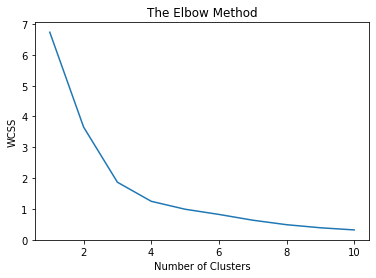

In [16]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

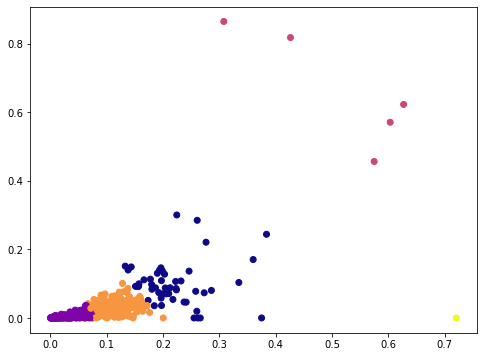

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],X[:,0],c=list(kmeans.labels_),cmap='plasma')

In [32]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1,
       3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 0, 3, 1, 0, 3, 1, 3, 1,
       3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 0, 1, 2, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 0, 3, 1, 3, 3, 3, 1, 1, 3, 0, 1, 3, 3, 0, 3,
       0, 0, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:

clust['clusters'] =list(kmeans.labels_)
clust_centroids = list(kmeans.cluster_centers_)

clust.head()

clust.to_csv('S:/Hackathons/EY/results/clust.csv',index = False)
pd.DataFrame(clust_centroids).to_csv('S:/Hackathons/EY/results/clust_centroids.csv',index = False)

For n_clusters = 2 The average silhouette_score is : 0.8717446753427475
For n_clusters = 3 The average silhouette_score is : 0.626419104747666
For n_clusters = 4 The average silhouette_score is : 0.5356108096436085
For n_clusters = 5 The average silhouette_score is : 0.533554204408695
For n_clusters = 6 The average silhouette_score is : 0.5140757715180452
For n_clusters = 7 The average silhouette_score is : 0.47335890702942174
For n_clusters = 8 The average silhouette_score is : 0.4800950512143906
For n_clusters = 9 The average silhouette_score is : 0.4803635291720206
For n_clusters = 10 The average silhouette_score is : 0.45291483767166807
For n_clusters = 11 The average silhouette_score is : 0.42866618107265675
For n_clusters = 12 The average silhouette_score is : 0.42461037574101324
For n_clusters = 13 The average silhouette_score is : 0.4171843839041035


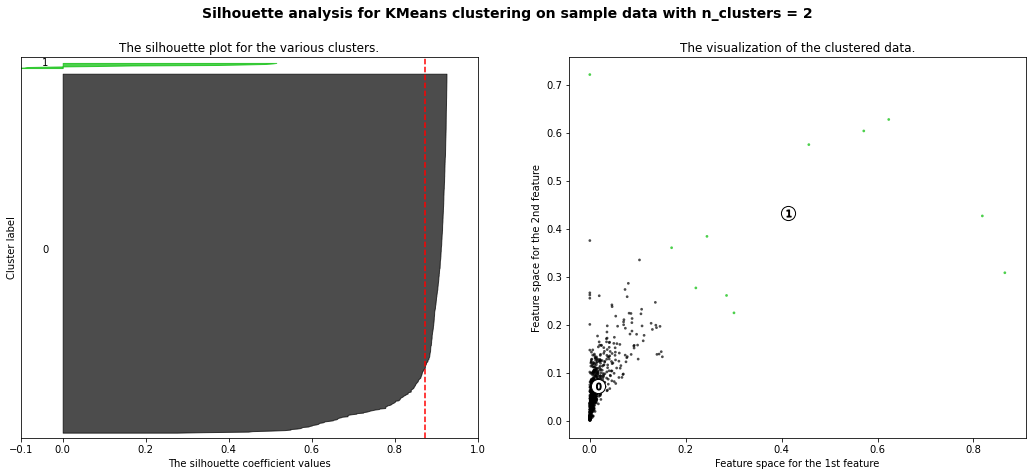

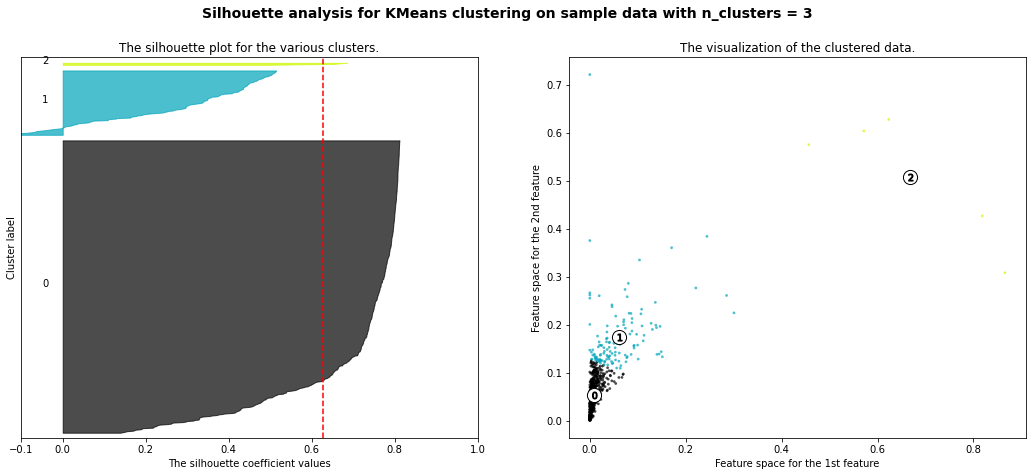

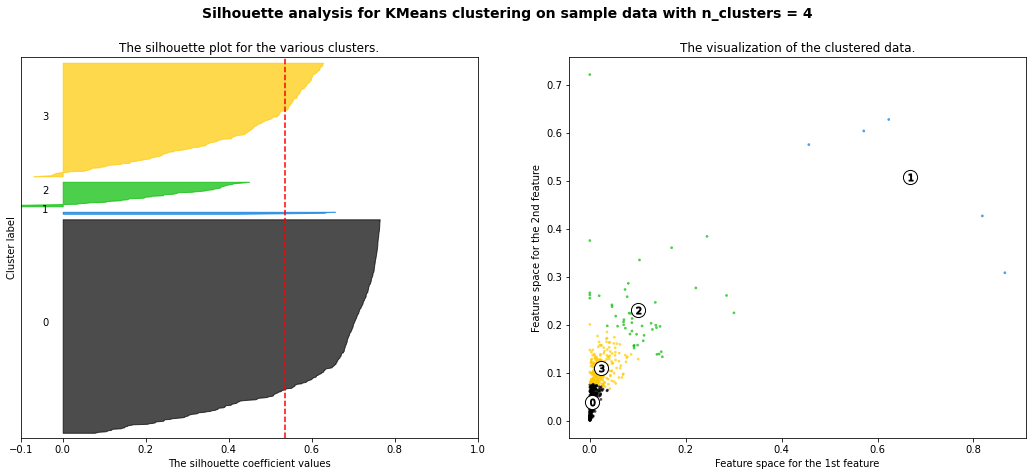

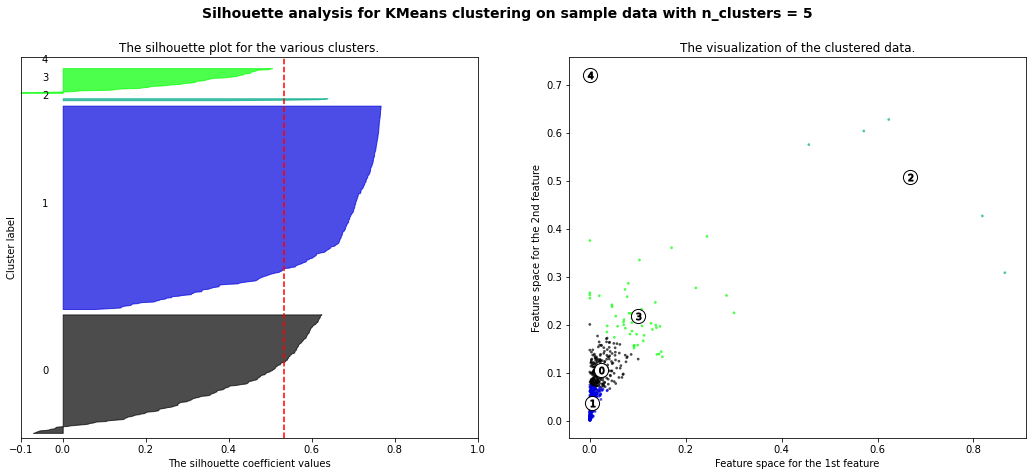

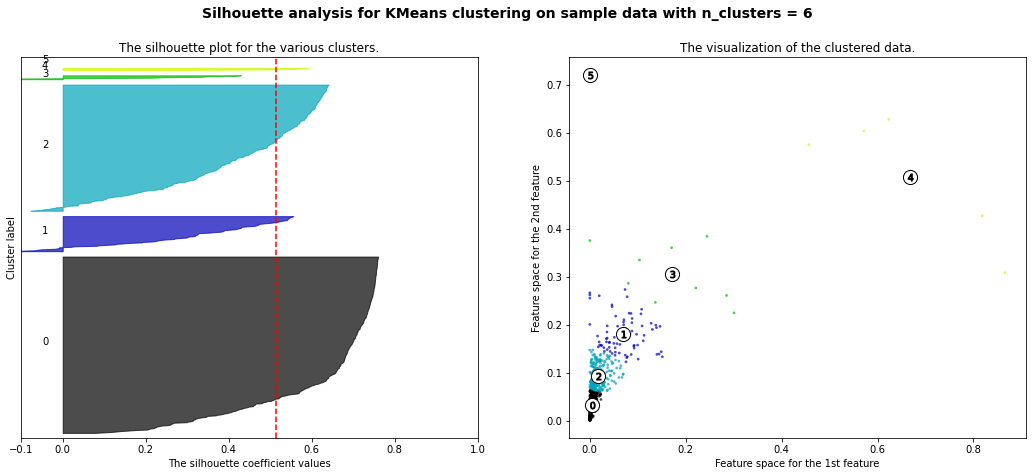

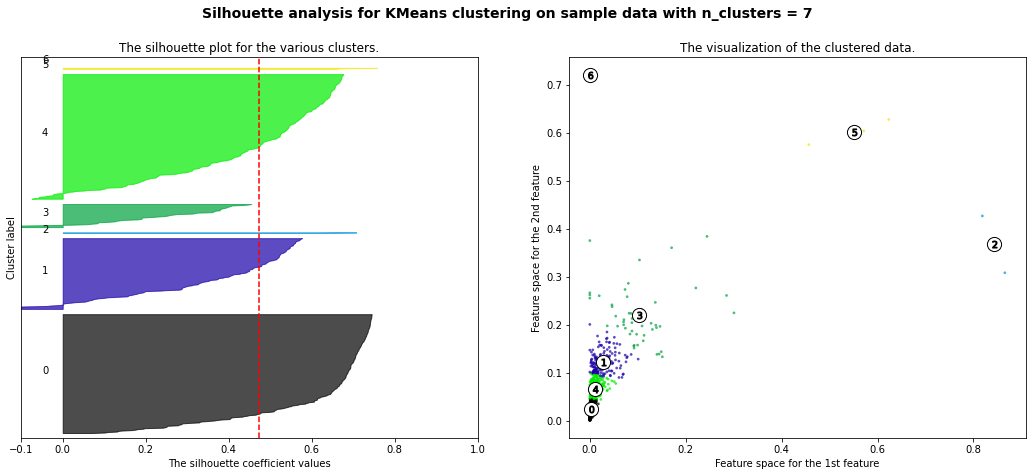

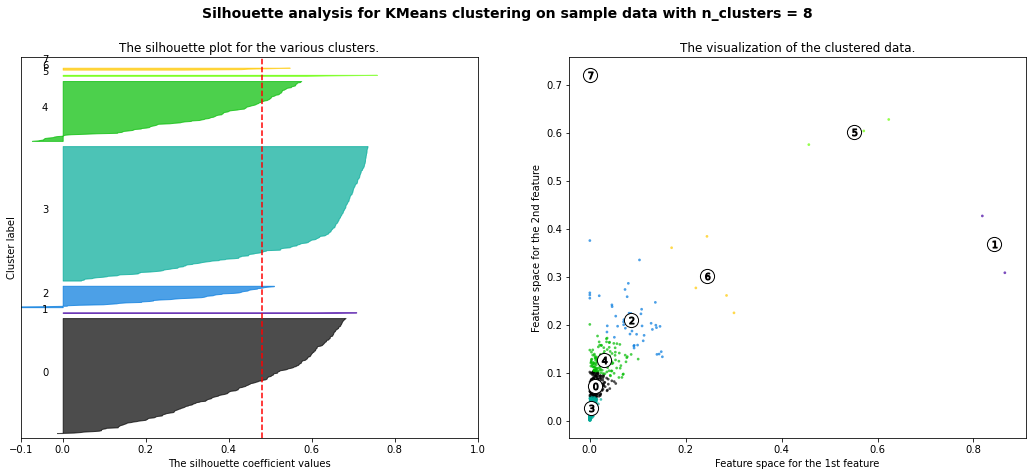

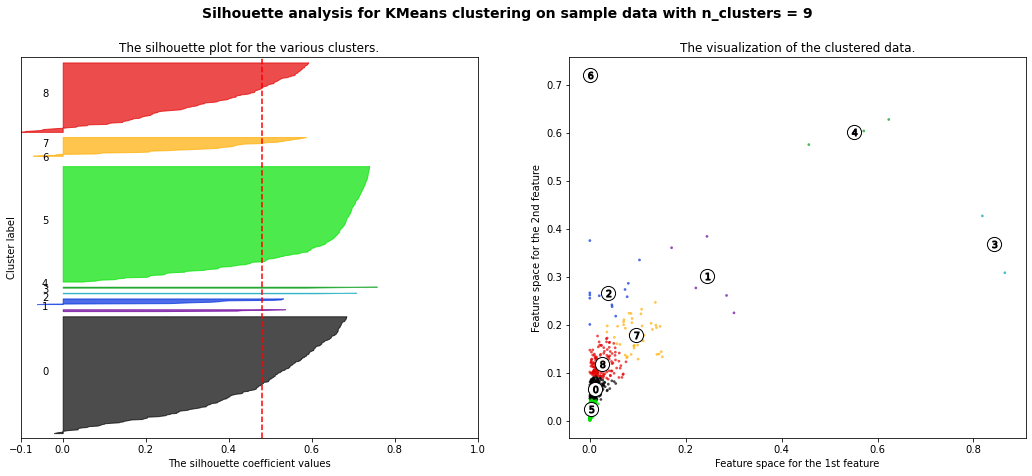

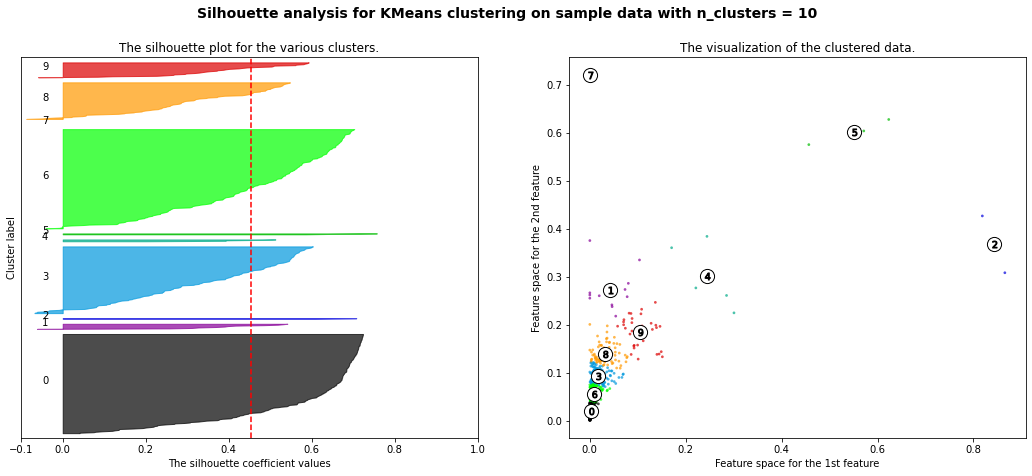

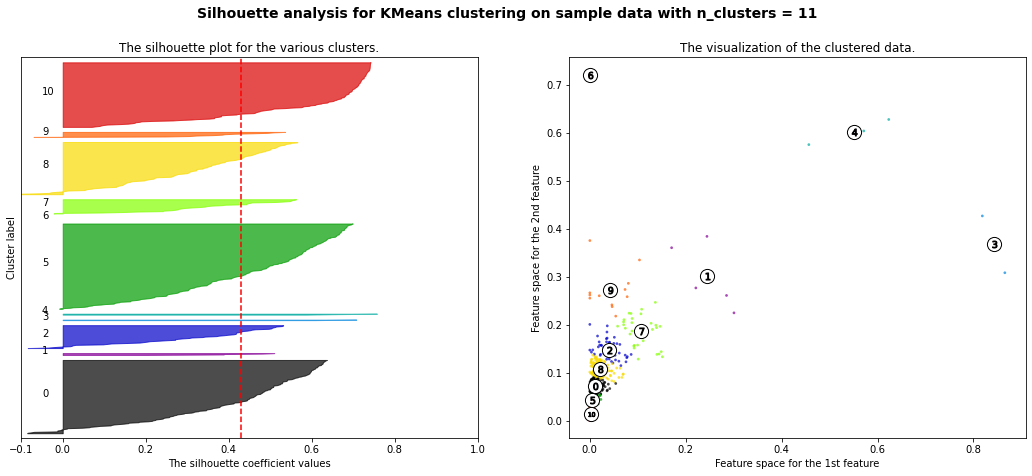

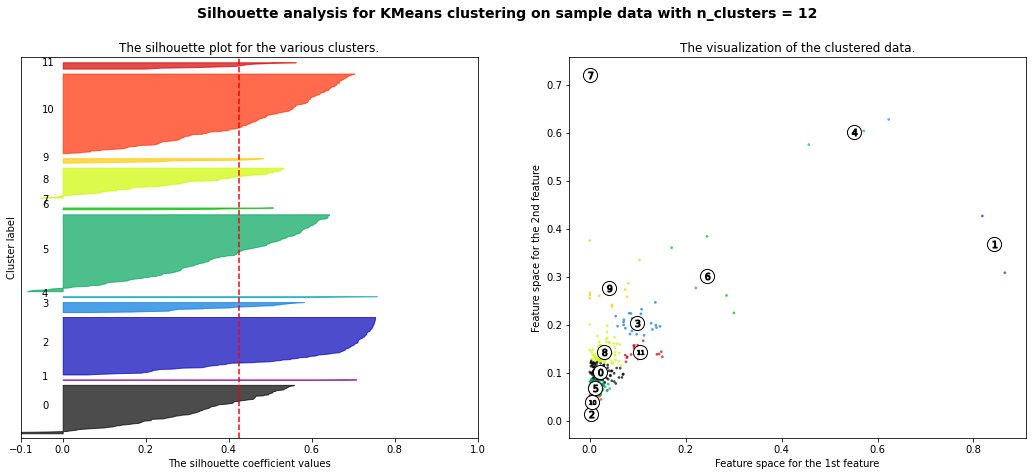

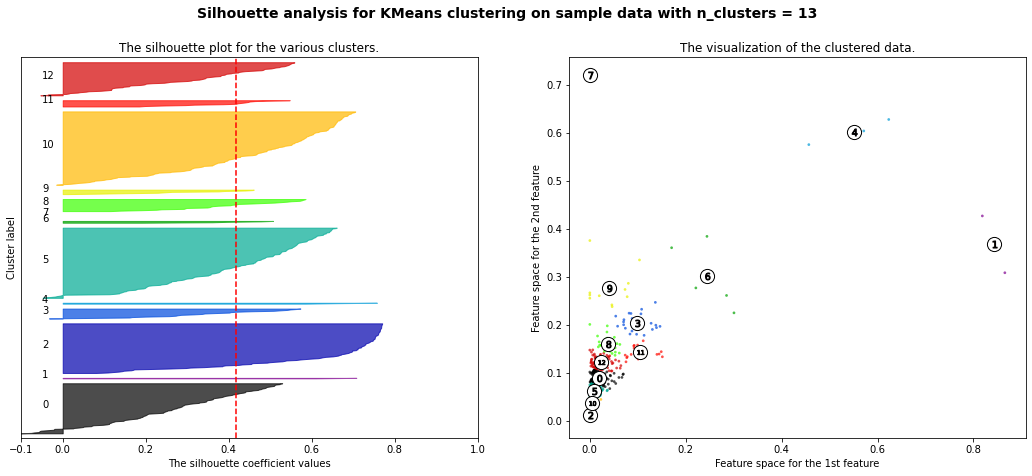

In [22]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()